# ESPRIT Data Model

This notebook tries to implement and demonstrate the data model used for ESPRIT parameter estimation algorithm purposed by [roy89]. ESPRIT is used to estimate the parameters, on which the received signal depend. There are many algorithms that can be used for this problem, such as MUSIC, Capon's method, periodogram and so on, but ESPRIT solves this problem with a higher performance and lower computational cost. ESPRIT could be used for many problems but for the demonstration we first use the Direction of Arrival (DOA) estimation data model and then we will see the case of harmonic retrieval too.


## DoA Data Model

The problem of DoA estimation is as following: we have the data from a sensor array and the objective is to locate the source point that is emiting energy that can be sensed by the sensor array. The emited energy can be modeled using Green's function, but it can be simplified using some assumptions.

First we assume that the transmission medium is linear, i.e. the superposition rule holds for the impinging wavefronts. Also the medium is assumed to be isotropic and non-dispersive which means that the velocity of wave propagation is constant in the medium in every direction (and the wave propagates though a straight line) and for every frequency of the emitted wave. Sources ara also far enough, such that the received wavefronts can be assumed to be in far-field region, i.e. the wavefronts at the sensors are planar. The other assumption is that the impinging wavefronts are narrowband, i.e. a delay in receiving a wavefront can be modeled with a phase shift. The bandpass signal is:

<center> $s_i^+(t) = \alpha_i(t)e^{j(2\pi f_ct + \beta_i(t))}$ <\center>
    
The narrowband assumption for the received bandpass signal $Re[s_i^+(t)]$ is:
    
<center> $\alpha_i(t - \tau) = \alpha_i(t); \beta_i(t - \tau) = \beta_i(t)$ <\center>

which translates to:
    
<center> $s_i^+(t - \tau) = e^{-j2\pi f_c\tau}s_i^+(t)$ <\center>
    
    

We first assume the planar case with a 1D arrayans after that we see the 2D and generalized tensor case. For the planar case we have a linear sensor array consisting of $M$ elements which can be assumed to be $m$ pairs of sensor elements, which are identical but spatially displaced. [haardt96] This geometry forms two subarray of sensors. Without any overlapping in the subarray elements we have $M = 2m$, but since overlapping is allowed, we generally have $M \leq 2m$. We assume the distance of the two subarrays to be $\Delta$. For the case with no overlapping of a single impinging wavefront we have:

In [4]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
M = 8
theta = 85 #in degrees

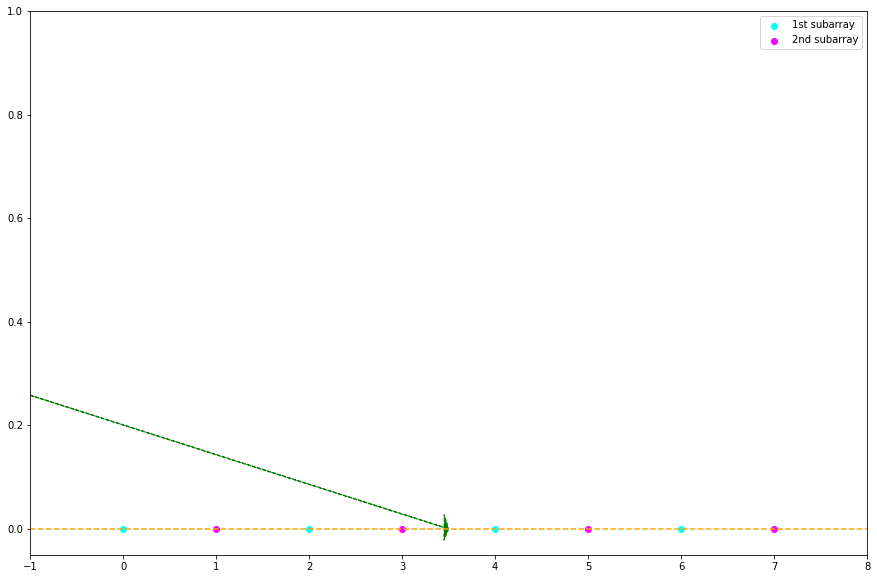

In [7]:
array_x = np.arange(M)

arrow_end = np.asarray([0.5, 0])*(M - 1)
slope = -1*np.tan(np.pi/180*(90 - theta))
arrow_start = np.asarray([0.5/slope + 0.5, 0.5])

#angle_arc = Arc(arrow_start

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(array_x[0::2], np.zeros(M)[0::2], c="cyan", label="1st subarray")
ax.scatter(array_x[1::2], np.zeros(M)[1::2], c="magenta", label="2nd subarray")
ax.legend()


ax.axhline(0, 0, M, ls="--", c="orange")
ax.axvline(arrow_start[0], arrow_start[1], arrow_start[1] - 0.2)
arrow_d = arrow_end - arrow_start
ax.arrow(arrow_start[0], arrow_start[1], arrow_d[0], arrow_d[1], color="g",head_width=0.05, head_length=0.05, length_includes_head=True, ls="--")

ax.set_ylim(0 - 0.05, 1)
ax.set_xlim(-1, M)

plt.show()

For the case of maximum overlapping we have the following array:

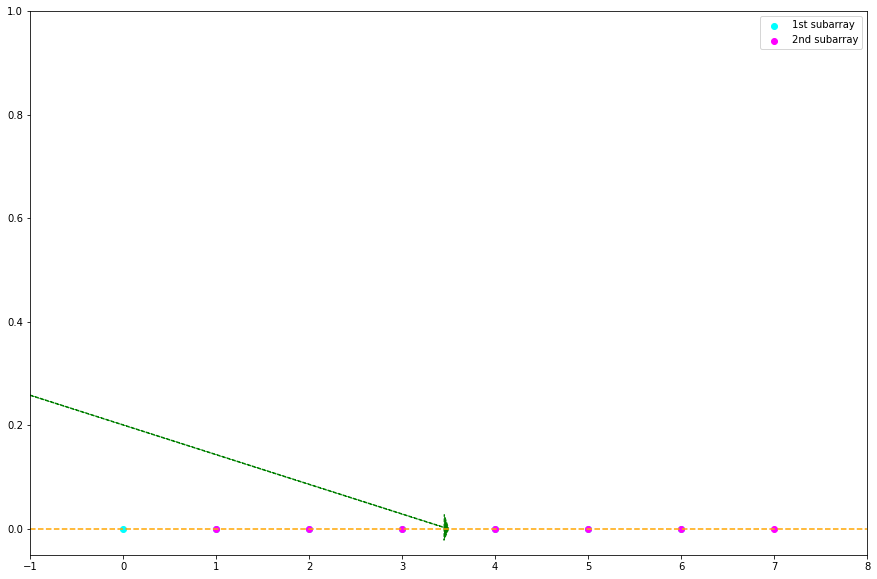

In [8]:
array_x = np.arange(M)

arrow_end = np.asarray([0.5, 0])*(M - 1)
slope = -1*np.tan(np.pi/180*(90 - theta))
arrow_start = np.asarray([0.5/slope + 0.5, 0.5])

#angle_arc = Arc(arrow_start

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(array_x[0:M-1], np.zeros(M)[0:M-1], c="cyan", label="1st subarray")
ax.scatter(array_x[1:M], np.zeros(M)[1:M], c="magenta", label="2nd subarray")
ax.legend()


ax.axhline(0, 0, M, ls="--", c="orange")
ax.axvline(arrow_start[0], arrow_start[1], arrow_start[1] - 0.2)
arrow_d = arrow_end - arrow_start
ax.arrow(arrow_start[0], arrow_start[1], arrow_d[0], arrow_d[1], color="g",head_width=0.05, head_length=0.05, length_includes_head=True, ls="--")

ax.set_ylim(0 - 0.05, 1)
ax.set_xlim(-1, M)

plt.show()

## Calculating the received signal

The propagation delay between two neighbouring elements (elements of a doublet) equals to $\tau = \frac{\Delta sin \theta}{c}$, where $\Delta$ is the distance between two elements inside the doublets and $c$ refers to the wave propagation velocity in the medium. Due to the narrowband assumption we can can translate this delay to a phase shift between the received signals of the elements:

<center>$s(t - \tau) = e^{-j\frac{2\pi f_c}{c}\Delta sin \theta}s(t)$<\center>
    
If we are using a unified linear array, then we can then define the spatial frequency $\mu = -\frac{2\pi}{\lambda}\Delta\sin \theta$ ($\lambda = \frac{c}{f_c}$ is the wavelength) which results to:(Otherwise, no constant $\mu$ can be defined and it will differ for each element)
    
<center>$s(t - \tau) = e^{j\mu}s(t)$<\center>

We definitely need a one-to-one mapping between the spatial frequency $-\pi< \mu < \pi$ and the range of possible DoAs $ \frac{\pi}{2}< \theta <\frac{\pi}{2}$. In order to ensure this, i.e. avoid ambiguities, we should satisfy the condition $\Delta \le \frac{\lambda}{2}$. Otherwise we have ambiguities in the range $\frac{\pi}{2}< \theta <\frac{\pi}{2}$ and the non-ambiguous range will be smaller than the intended range.
    
For the case of multiple elements (more than two) we form a vector with a length equal to the number of elements.
    
We should also consider the noise at the sender and receiver terminal. For this case we assume an additive white gaussian noise (AWGN), that its power is defined by the intended signal to noise ratio of the measurement. 

In a vectorized form the received signal by each element can be calculated as:
    
<center>$\textbf{x} = \textbf{a}(\theta) \odot s(t - \boldsymbol{\tau}) = \textbf{a}(\theta)e^{-j\frac{2\pi f_c}{c}sin \theta}s(t) + \textbf{n}$<\center>
    
Where $\textbf{a}(\theta)$ is a vector of dimension $\textbf{a} \in \mathbf{C}^{M \times 1}$. For the URA case, this can be formulated using $\mu = -\frac{2\pi}{\lambda}\Delta\sin \theta$:
    
<center>$\textbf{x} = \textbf{a}(\mu)e^{j\boldsymbol{\mu}}s(t) + \textbf{n}$ <\center>

For generalizing the problem, define the delay between two elements using vector dot-production.

<center>$\tau_k = \frac{1}{C} \textbf{p}_k^T\cdot \textbf{d}$ <\center>
    
Where $\textbf{p}_k$ is the position of the k-th element and $\textbf{d}$ is the unit vector pointing to the direction of the source.


In [34]:
# Defining the model parameters
SNR = 20
C = 3e8
fc = 1e9
theta = np.pi/4

# Calculating mu for each element
tau = np.dot((element_pos_vec - ref_element_pos).T, d_vec)/C
phi = -2*np.pi*fc*tau


d_vec = np.asarray([np.cos(theta), np.sin(theta)])[:, None]
element_pos_vec = np.asarray([[0, 1, 2, 3, 4, 5, 6, 7], [0, 0, 0, 0, 0, 0, 0, 0]])
M = element_pos_vec.shape[1]
ref_element_pos = element_pos_vec[:, :1]




noise_power = 10**(-SNR/10)

x_vec = np.random.randn(1)*np.exp(1j*phi) + noise_power*np.random.randn(M, 1)

In [35]:
x_vec

array([[ 0.92375373+0.j        ],
       [-0.57561052-0.73091077j],
       [-0.21654531+0.91056701j],
       [ 0.82762217-0.4034716j ],
       [-0.82429591-0.40792298j],
       [ 0.19090051+0.91166115j],
       [ 0.59465595-0.72782246j],
       [-0.94193917-0.00494154j]])

## Multiple Snapshots

We could also observe the received signal in time, i.e. observe multiple sanpshots of the received signal. If so, we will have a matrix $\textbf{X} \in C^{M \times N}$ as the output, instead of a vector.

In [36]:
SNR = 20
C = 3e8
fc = 1e9
N = 15 # Number of snapshots
theta = np.pi/4
d_vec = np.asarray([np.cos(theta), np.sin(theta)])[:, None]
element_pos_vec = np.asarray([[0, 1, 2, 3, 4, 5, 6, 7], [0, 0, 0, 0, 0, 0, 0, 0]])

M = element_pos_vec.shape[1]
ref_element_pos = element_pos_vec[:, :1]

tau = np.dot((element_pos_vec - ref_element_pos).T, d_vec)/C
phi = -2*np.pi*fc*tau

noise_power = 10**(-SNR/10)

x_mat = np.random.randn(N)*np.exp(1j*phi) + noise_power*np.random.randn(M, N)

## Sensor directional pattern

The above model assumes that the sensor elements in the array are omni-directional, i.e. they absorb equal power in all directions. But we could also assume that they have directional properties.

In [8]:
def dipol_pattern(theta):
    return np.abs(np.sin(theta))

SNR = 20
C = 3e8
fc = 1e9
N = 15 # Number of snapshots
theta = np.pi/4

d_vec = np.asarray([np.cos(theta), np.sin(theta)])[:, None]
element_pos_vec = np.asarray([[0, 1, 2, 3, 4, 5, 6, 7], [0, 0, 0, 0, 0, 0, 0, 0]])

M = element_pos_vec.shape[1]
ref_element_pos = element_pos_vec[:, :1]

tau = np.dot((element_pos_vec - ref_element_pos).T, d_vec)/C
phi = -2*np.pi*fc*tau

noise_power = 10**(-SNR/10)

x_mat = dipol_pattern(theta)*np.random.randn(N)*np.exp(1j*phi) + (np.random.randn(M, N) + 1j*np.random.randn(M, N))*(noise_power/np.sqrt(2))

## Multiple wavefronts

If we have not one, but many impinging wavefronts, we can should expand the dicussed model so the it matches the new conditions. In this case we can calculate the array input using matrix multiplication.


In [13]:
theta = np.asarray([np.pi/4, 3*np.pi/4])

SNR = 20
C = 3e8
fc = 1e9
N = 15 # Number of snapshots

d_vec = np.asarray([np.cos(theta), np.sin(theta)])
element_pos_vec = np.asarray([[0, 1, 2, 3, 4, 5, 6, 7], [0, 0, 0, 0, 0, 0, 0, 0]])

M = element_pos_vec.shape[1]
d = theta.shape[0]

ref_element_pos = element_pos_vec[:, :1]

tau = np.dot((element_pos_vec - ref_element_pos).T, d_vec)/C
phi = -2*np.pi*fc*tau

noise_power = 10**(-SNR/10)

x_mat = np.dot(np.exp(1j*phi), np.random.randn(d, N)) + (np.random.randn(M, N) + 1j*np.random.randn(M, N))*(noise_power/np.sqrt(2))

## Non-uniform Array

Now we wrap all of the efforts for non-unified linear array inside a single python method.

In [47]:
import pdb

def get_array_output(theta, fc, N, S, array_pos, SNR=0):
    C = 3e8
    noise_power = 10**(-SNR/10)
    M = element_pos_vec.shape[1]
    d = theta.shape[0]
    ref_element_pos = element_pos_vec[:, :1]
    
    d_vec = np.asarray([np.cos(theta), np.sin(theta)])
    tau = np.dot((element_pos_vec - ref_element_pos).T, d_vec)/C
    phi = -2*np.pi*fc*tau
    
    return np.dot(np.exp(1j*phi), S) + noise_power*np.random.randn(M, N)

def plot_array_scenario(array_pos, theta):
    d = theta.shape[0]

    arrow_end = np.mean(array_pos, axis=1)
    slope = -1*np.tan(np.pi/180*(90 - theta))
    arrow_start[0, :] = 0.5/slope + 0.5
    arrow_start[1, :] = 0.5

    #angle_arc = Arc(arrow_start
    pdb.set_trace()
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(array_pos[0, :], array_pos[1, :], c="cyan", label="array elements")
    ax.legend()


    ax.axhline(0, 0, M, ls="--", c="orange")
    #ax.axvline(arrow_start[0], arrow_start[1], arrow_start[1] - 0.2)
    for ai in range(d):
        arrow_d = arrow_end - arrow_start[:, ai]
        ax.arrow(arrow_start[0, ai], arrow_start[1, ai], arrow_d[0], arrow_d[1],head_width=0.05, head_length=0.05, length_includes_head=True, ls="--")

    ax.set_ylim(0 - 0.05, 1)
    ax.set_xlim(-1, M)

    plt.show()

> <ipython-input-47-31bf8773c485>(26)plot_scenario()
     24     #angle_arc = Arc(arrow_start
     25     pdb.set_trace()
---> 26     fig, ax = plt.subplots(figsize=(15, 10))
     27     ax.scatter(array_pos[0, :], array_pos[1, :], c="cyan", label="array elements")
     28     ax.legend()



ipdb>  arrow_start


array([[0.49086046, 0.49314568],
       [0.5       , 0.5       ]])
--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


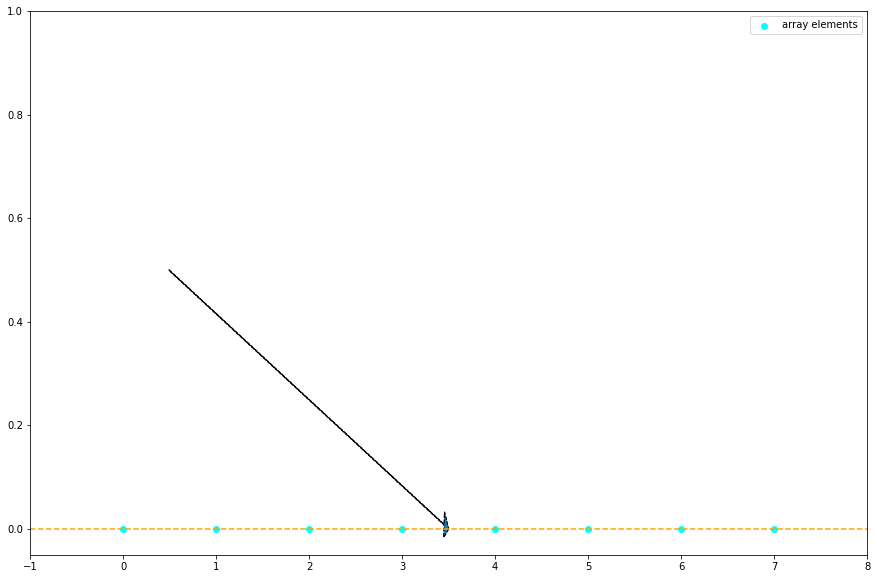

In [48]:
theta = np.asarray([np.pi/3, np.pi/4])
d = theta.shape[0]
array_pos = np.asarray([[0, 1, 2, 3, 4, 5, 6, 7], [0, 0, 0, 0, 0, 0, 0, 0]])

plot_scenario(array_pos, theta)

## The simpler case of ULA

For a ULA we can simply describe the array using the number of elements in the array and spatial frequency for the direction of arrival.

In [63]:
def get_ula_output(mu, N, M, S, SNR=0):
    C = 3e8
    noise_power = 10**(-SNR/10)
    d = mu.shape[0]
    wave_length = C/fc
    A = np.exp(np.repeat(1j*np.arange(M)[:, None], d, axis=1)*mu)
    
    return np.dot(A, S) + (np.random.randn(M, N) + 1j*np.random.randn(M, N))*(noise_power/np.sqrt(2))


## Signal Subspace

In [64]:
u, s, vh = np.linalg.svd(x)
s

## 2D Array

## Harmonic Retrieval

In [22]:
def get_harmonic_data(
    S: np.ndarray,# shape= (d,N), where d is the number of parameters and N is the number of measurement channels. dtype=complex
    theta: np.ndarray, #shape=(d,). dtype= complex
    M: int, # number of snapshots 
    SNR=0):
    
    d, N = S.shape
    noise_power = 10**(-SNR/10) / np.sqrt(2)
    Z = np.exp(theta)
    A = np.vander(Z, M, increasing=True)
    X = np.dot(A.T, S) + (np.random.randn(M, N) + 1j*np.random.randn(M, N))*(noise_power/np.sqrt(2))
    return X
    
    
S = np.ones((3,1))
theta = np.ones(3)*(0.5*1j - 0.05)
X = get_harmonic_data(S, theta, 160, SNR=100)

## Multi-dimensional inputs (Introduction to tensor-ESPRIT)

## Wrapping up

# References

[roy89] Richard Roy and Thomas Kailath, ESPRIT-Estimation of Signal Parameters Via Rotational Invariance Techniques, 1989

[haardt96] Martin Haardt, Efficient One-, Two-, and Multidimensional High-Resolution Array Signal Processing, 1996